# Pivot Tables

Pivoting data can sometimes help clarify relationships and connections.

Full documentation on a variety of related pivot methods: https://pandas.pydata.org/docs/user_guide/reshaping.html

## Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Sales_Funnel_CRM.csv')

In [3]:
df

,Account Number,Company,Contact,Account Manager,Product,Licenses,Sale Price,Status
0,2123398,Google,Larry Pager,Edward Thorp,Analytics,150,2100000,Presented
1,2123398,Google,Larry Pager,Edward Thorp,Prediction,150,700000,Presented
2,2123398,Google,Larry Pager,Edward Thorp,Tracking,300,350000,Under Review
3,2192650,BOBO,Larry Pager,Edward Thorp,Analytics,150,2450000,Lost
4,420496,IKEA,Elon Tusk,Edward Thorp,Analytics,300,4550000,Won
5,636685,Tesla Inc.,Elon Tusk,Edward Thorp,Analytics,300,2800000,Under Review
6,636685,Tesla Inc.,Elon Tusk,Edward Thorp,Prediction,150,700000,Presented
7,1216870,Microsoft,Will Grates,Edward Thorp,Tracking,300,350000,Under Review
8,2200450,Walmart,Will Grates,Edward Thorp,Analytics,150,2450000,Lost
9,405886,Apple,Cindy Phoner,Claude Shannon,Analytics,300,4550000,Won


# The pivot() method

The pivot method reshapes data based on column values and reassignment of the index. Keep in mind, it doesn't always make sense to pivot data. Pivot methods are mainly for data analysis,visualization, and exploration.

----

Here is an image showing the idea behind a pivot() call:

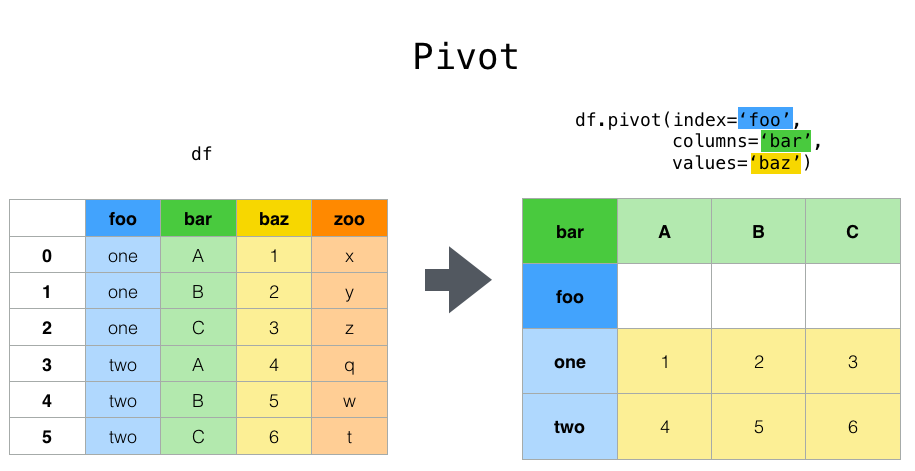

In [4]:
help(pd.pivot)

Help on function pivot in module pandas.core.reshape.pivot:

pivot(data: 'DataFrame', index: 'IndexLabel | None' = None, columns: 'IndexLabel | None' = None, values: 'IndexLabel | None' = None) -> 'DataFrame'
    Return reshaped DataFrame organized by given index / column values.
    
    Reshape data (produce a "pivot" table) based on column values. Uses
    unique values from specified `index` / `columns` to form axes of the
    resulting DataFrame. This function does not support data
    aggregation, multiple values will result in a MultiIndex in the
    columns. See the :ref:`User Guide <reshaping>` for more on reshaping.
    
    Parameters
    ----------
    data : DataFrame
    index : str or object or a list of str, optional
        Column to use to make new frame's index. If None, uses
        existing index.
    
        .. versionchanged:: 1.1.0
           Also accept list of index names.
    
    columns : str or object or a list of str
        Column to use to make new fra

----
#### Note: Common Point of Confusion: Students often just randomly pass in index,column, and value choices in an attempt to see the changes. This often just leads to formatting errors. You should first go through this checklist BEFORE running a pivot():

* What question are you trying to answer?
* What would a dataframe that answers the question look like? Does it need a pivot()
* What you want the resulting pivot to look like? Do you need all the original columns?

-----

In [5]:
df

,Account Number,Company,Contact,Account Manager,Product,Licenses,Sale Price,Status
0,2123398,Google,Larry Pager,Edward Thorp,Analytics,150,2100000,Presented
1,2123398,Google,Larry Pager,Edward Thorp,Prediction,150,700000,Presented
2,2123398,Google,Larry Pager,Edward Thorp,Tracking,300,350000,Under Review
3,2192650,BOBO,Larry Pager,Edward Thorp,Analytics,150,2450000,Lost
4,420496,IKEA,Elon Tusk,Edward Thorp,Analytics,300,4550000,Won
5,636685,Tesla Inc.,Elon Tusk,Edward Thorp,Analytics,300,2800000,Under Review
6,636685,Tesla Inc.,Elon Tusk,Edward Thorp,Prediction,150,700000,Presented
7,1216870,Microsoft,Will Grates,Edward Thorp,Tracking,300,350000,Under Review
8,2200450,Walmart,Will Grates,Edward Thorp,Analytics,150,2450000,Lost
9,405886,Apple,Cindy Phoner,Claude Shannon,Analytics,300,4550000,Won


--------
** What type of question does a pivot help answer?**

**Imagine we wanted to know, how many licenses of each product type did Google purchase? Currently the way the data is formatted is hard to read. Let's pivot it so this is clearer, we will take a subset of the data for the question at hand.**

In [6]:
# Let's take a subset, otherwise we'll get an error due to duplicate rows and data
licenses = df[['Company','Product','Licenses']]
licenses

,Company,Product,Licenses
0,Google,Analytics,150
1,Google,Prediction,150
2,Google,Tracking,300
3,BOBO,Analytics,150
4,IKEA,Analytics,300
5,Tesla Inc.,Analytics,300
6,Tesla Inc.,Prediction,150
7,Microsoft,Tracking,300
8,Walmart,Analytics,150
9,Apple,Analytics,300


In [7]:
pd.pivot(data=licenses,index='Company',columns='Product',values='Licenses')

Product,Analytics,GPS Positioning,Prediction,Tracking
Company,,,,
Google,150.0,NaN,150.0,300.0
ATT,NaN,NaN,150.0,150.0
Apple,300.0,NaN,NaN,NaN
BOBO,150.0,NaN,NaN,NaN
CVS Health,NaN,NaN,NaN,450.0
Cisco,300.0,300.0,NaN,NaN
Exxon Mobile,150.0,NaN,NaN,NaN
IKEA,300.0,NaN,NaN,NaN
Microsoft,NaN,NaN,NaN,300.0


## The pivot_table() method

Similar to the pivot() method, the pivot_table() can add aggregation functions to a pivot call.

In [8]:
df

,Account Number,Company,Contact,Account Manager,Product,Licenses,Sale Price,Status
0,2123398,Google,Larry Pager,Edward Thorp,Analytics,150,2100000,Presented
1,2123398,Google,Larry Pager,Edward Thorp,Prediction,150,700000,Presented
2,2123398,Google,Larry Pager,Edward Thorp,Tracking,300,350000,Under Review
3,2192650,BOBO,Larry Pager,Edward Thorp,Analytics,150,2450000,Lost
4,420496,IKEA,Elon Tusk,Edward Thorp,Analytics,300,4550000,Won
5,636685,Tesla Inc.,Elon Tusk,Edward Thorp,Analytics,300,2800000,Under Review
6,636685,Tesla Inc.,Elon Tusk,Edward Thorp,Prediction,150,700000,Presented
7,1216870,Microsoft,Will Grates,Edward Thorp,Tracking,300,350000,Under Review
8,2200450,Walmart,Will Grates,Edward Thorp,Analytics,150,2450000,Lost
9,405886,Apple,Cindy Phoner,Claude Shannon,Analytics,300,4550000,Won


In [9]:
# Notice Account Number sum() doesn't make sense to keep/use
pd.pivot_table(df,index="Company",aggfunc='sum')

,Account Number,Licenses,Sale Price
Company,,,
Google,6370194,600,3150000
ATT,1396064,300,1050000
Apple,405886,300,4550000
BOBO,2192650,150,2450000
CVS Health,902797,450,490000
Cisco,4338998,600,4900000
Exxon Mobile,470248,150,2100000
IKEA,420496,300,4550000
Microsoft,1216870,300,350000


In [10]:
# Either grab the columns
pd.pivot_table(df,index="Company",aggfunc='sum')[['Licenses','Sale Price']]

,Licenses,Sale Price
Company,,
Google,600,3150000
ATT,300,1050000
Apple,300,4550000
BOBO,150,2450000
CVS Health,450,490000
Cisco,600,4900000
Exxon Mobile,150,2100000
IKEA,300,4550000
Microsoft,300,350000


In [11]:
# Or state them as wanted values
pd.pivot_table(df,index="Company",aggfunc='sum',values=['Licenses','Sale Price'])

,Licenses,Sale Price
Company,,
Google,600,3150000
ATT,300,1050000
Apple,300,4550000
BOBO,150,2450000
CVS Health,450,490000
Cisco,600,4900000
Exxon Mobile,150,2100000
IKEA,300,4550000
Microsoft,300,350000


In [12]:
df.groupby('Company').sum()[['Licenses','Sale Price']]

,Licenses,Sale Price
Company,,
Google,600,3150000
ATT,300,1050000
Apple,300,4550000
BOBO,150,2450000
CVS Health,450,490000
Cisco,600,4900000
Exxon Mobile,150,2100000
IKEA,300,4550000
Microsoft,300,350000


In [13]:
pd.pivot_table(df,index=["Account Manager","Contact"],values=['Sale Price'],aggfunc='sum')

Sale Price
Account Manager Contact                 
Claude Shannon  Cindy Phoner     7700000
                Emma Gordian    12390000
Edward Thorp    Elon Tusk        8050000
                Larry Pager      5600000
                Will Grates      2800000

Columns are optional - they provide an additional way to segment the actual values you care about. The aggregation functions are applied to the values you list.

In [14]:
pd.pivot_table(df,index=["Account Manager","Contact"],values=["Sale Price"],columns=["Product"],aggfunc=[np.sum])

sum                                     
                              Sale Price                                     
Product                        Analytics GPS Positioning Prediction  Tracking
Account Manager Contact                                                      
Claude Shannon  Cindy Phoner   6650000.0             NaN   700000.0  350000.0
                Emma Gordian  11550000.0        350000.0        NaN  490000.0
Edward Thorp    Elon Tusk      7350000.0             NaN   700000.0       NaN
                Larry Pager    4550000.0             NaN   700000.0  350000.0
                Will Grates    2450000.0             NaN        NaN  350000.0

In [15]:
pd.pivot_table(df,index=["Account Manager","Contact"],values=["Sale Price"],columns=["Product"],aggfunc=[np.sum],fill_value=0)

sum                                    
                             Sale Price                                    
Product                       Analytics GPS Positioning Prediction Tracking
Account Manager Contact                                                    
Claude Shannon  Cindy Phoner    6650000               0     700000   350000
                Emma Gordian   11550000          350000          0   490000
Edward Thorp    Elon Tusk       7350000               0     700000        0
                Larry Pager     4550000               0     700000   350000
                Will Grates     2450000               0          0   350000

In [16]:
# Can add multiple agg functions
pd.pivot_table(df,index=["Account Manager","Contact"],values=["Sale Price"],columns=["Product"],
               aggfunc=[np.sum,np.mean],fill_value=0)

sum                                      \
                             Sale Price                                       
Product                       Analytics GPS Positioning Prediction Tracking   
Account Manager Contact                                                       
Claude Shannon  Cindy Phoner    6650000               0     700000   350000   
                Emma Gordian   11550000          350000          0   490000   
Edward Thorp    Elon Tusk       7350000               0     700000        0   
                Larry Pager     4550000               0     700000   350000   
                Will Grates     2450000               0          0   350000   

                                   mean                                      
                             Sale Price                                      
Product                       Analytics GPS Positioning Prediction Tracking  
Account Manager Contact                                                      
Claude Shannon  Cindy Phoner    3325000               0     700000   350000  
                Emma Gordian    5775000          350000          0   490000  
Edward Thorp    Elon Tusk       3675000               0     700000        0  
                Larry Pager     2275000               0     700000   350000  
                Will Grates     2450000               0          0   350000

In [17]:
# Can add on multiple columns
pd.pivot_table(df,index=["Account Manager","Contact"],values=["Sale Price","Licenses"],columns=["Product"],
               aggfunc=[np.sum],fill_value=0)

sum                                      \
                              Licenses                                       
Product                      Analytics GPS Positioning Prediction Tracking   
Account Manager Contact                                                      
Claude Shannon  Cindy Phoner       450               0        150      150   
                Emma Gordian      1050             300          0      450   
Edward Thorp    Elon Tusk          600               0        150        0   
                Larry Pager        300               0        150      300   
                Will Grates        150               0          0      300   

                                                                             
                             Sale Price                                      
Product                       Analytics GPS Positioning Prediction Tracking  
Account Manager Contact                                                      
Claude Shannon  Cindy Phoner    6650000               0     700000   350000  
                Emma Gordian   11550000          350000          0   490000  
Edward Thorp    Elon Tusk       7350000               0     700000        0  
                Larry Pager     4550000               0     700000   350000  
                Will Grates     2450000               0          0   350000

In [18]:
# Can add on multiple columns
pd.pivot_table(df,index=["Account Manager","Contact","Product"],values=["Sale Price","Licenses"],
               aggfunc=[np.sum],fill_value=0)

sum           
                                             Licenses Sale Price
Account Manager Contact      Product                            
Claude Shannon  Cindy Phoner Analytics            450    6650000
                             Prediction           150     700000
                             Tracking             150     350000
                Emma Gordian Analytics           1050   11550000
                             GPS Positioning      300     350000
                             Tracking             450     490000
Edward Thorp    Elon Tusk    Analytics            600    7350000
                             Prediction           150     700000
                Larry Pager  Analytics            300    4550000
                             Prediction           150     700000
                             Tracking             300     350000
                Will Grates  Analytics            150    2450000
                             Tracking             300     350000

In [19]:
# get Final "ALL" with margins = True
# Can add on multiple columns
pd.pivot_table(df,index=["Account Manager","Contact","Product"],values=["Sale Price","Licenses"],
               aggfunc=[np.sum],fill_value=0,margins=True)

sum           
                                             Licenses Sale Price
Account Manager Contact      Product                            
Claude Shannon  Cindy Phoner Analytics            450    6650000
                             Prediction           150     700000
                             Tracking             150     350000
                Emma Gordian Analytics           1050   11550000
                             GPS Positioning      300     350000
                             Tracking             450     490000
Edward Thorp    Elon Tusk    Analytics            600    7350000
                             Prediction           150     700000
                Larry Pager  Analytics            300    4550000
                             Prediction           150     700000
                             Tracking             300     350000
                Will Grates  Analytics            150    2450000
                             Tracking             300     350000
All                                              4500   36540000

In [20]:
pd.pivot_table(df,index=["Account Manager","Status"],values=["Sale Price"],
               aggfunc=[np.sum],fill_value=0,margins=True)

sum
                             Sale Price
Account Manager Status                 
Claude Shannon  Lost            4550000
                Presented       3150000
                Under Review     350000
                Won            12040000
Edward Thorp    Lost            4900000
                Presented       3500000
                Under Review    3500000
                Won             4550000
All                            36540000